# Assignment 3 - Poisson Regression and Survival Analysis
SPPH 500 - Ly Trinh

### Question 1

The data set SkinCancer.txt contains data on non-melanoma skin cancer for individuals, grouped by age in two metropolitan areas: Dallas-Fort Worth and Minneapolis-St.Paul. The data also records the proportion of women in each strata. The variables recorded are: 

• AgeGroup: A=15-24, B=25-34, C=35-44, D=45-54, E=55-64, F=64-74, G=75-84, H=85+ \
• Location: The location of the women recorded as Dallas or Minneapolis \
• CancerCases: The numerical number of non-melanoma skin cancer cases, for each city and age group \
• PopSize: The numeric size of the population in each city/age group, used as the total number of people at risk. \
• PropWomen: The proportion of women in the groups.
 
The goal is to determine whether the risk of skin cancer is higher in Dallas than in Minneapolis. By risk, we mean the probability of developing non-melanoma skin cancer.  

In [ ]:
# load packages
library(tidyverse) #for creating variables and plotting graphs with ggplots

In [ ]:
# load data set
SkinCancer <- read.delim('./SkinCancer.txt', header=T, sep="")
dim(SkinCancer) #dimensions (row x column)
SkinCancer
summary(SkinCancer)

In [63]:
#rename Minnesota to MSP and Dallas to DFW
SkinCancer <- SkinCancer %>%
    mutate(Location=recode_factor(Location, Dallas="DFW", Minnesota="MSP"))
summary(SkinCancer)

    AgeGroup  CancerCases       PopSize       Location   PropWomen     
 A      :2   Min.   :  1.0   Min.   :  7538   DFW:8    Min.   :0.4100  
 B      :2   1st Qu.: 36.0   1st Qu.: 49088   MSP:8    1st Qu.:0.4500  
 C      :2   Median : 86.5   Median : 87528            Median :0.4750  
 D      :2   Mean   :110.3   Mean   : 86697            Mean   :0.4775  
 E      :2   3rd Qu.:155.0   3rd Qu.:121797            3rd Qu.:0.5125  
 F      :2   Max.   :310.0   Max.   :181343            Max.   :0.5500  
 (Other):4                                                             

#### (a) Offsets:

In a few sentences, explain the idea of using an offset in Poisson Regression. That is, what is the purpose of the offset term?  When/Why do we include one?  Will we use an offset in our model, and if so, which variable will be the offset?

#### (b) Initial Examination:  

Make a plot of the observed cancer rates (per 100,000 people) for each age group in each location.  Make the same plot, but this time using the log of the observed rates (recall that Poisson regression models the log-rate as a linear function of the X’s).  Comment on any associations you observe from the plots.  Also comment on 
whether or not it appears that AgeGroup is an effect modifier of the Location effect. 

In [64]:
# plot of cancer rates per 100,000 people for each age group in each location
# create a new variable for cancer rates per 100,000 ppl and log-cancer rate
SkinCancer <- SkinCancer %>%
    mutate(RatePer100k = CancerCases*100000/PopSize) %>%
    mutate(logRate = log(RatePer100k))
head(SkinCancer)

AgeGroup,CancerCases,PopSize,Location,PropWomen,RatePer100k,logRate
A,1,172675,MSP,0.53,0.5791226,-0.546241
B,16,123065,MSP,0.48,13.0012595,2.565046
C,30,96216,MSP,0.51,31.1798453,3.439772
D,71,92051,MSP,0.53,77.1311556,4.345507
E,102,72159,MSP,0.45,141.3545088,4.951271
F,130,54722,MSP,0.45,237.5644165,5.470439


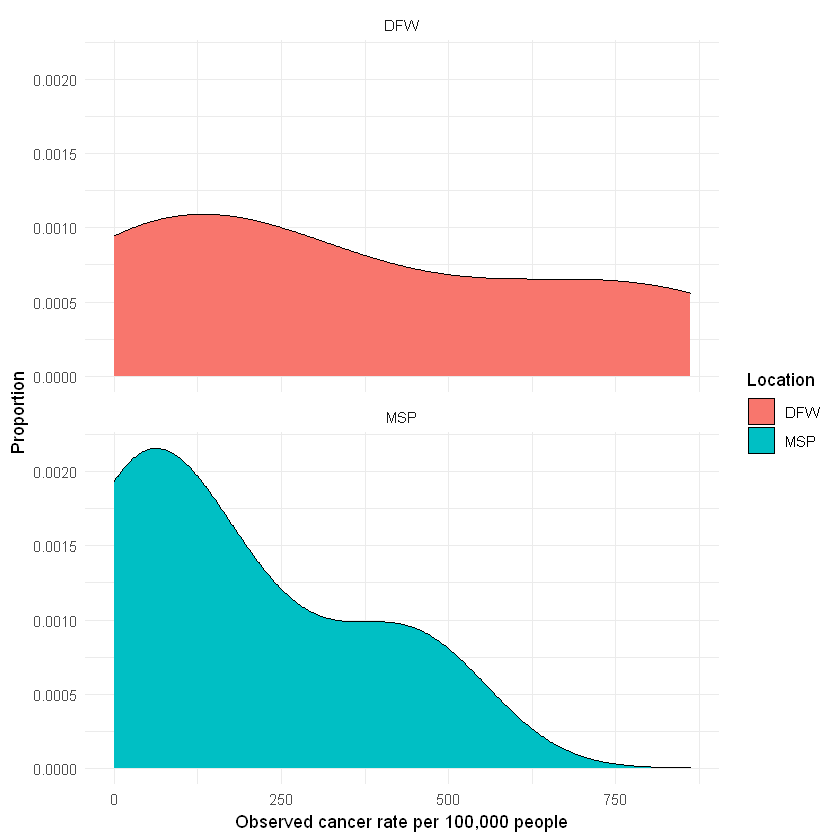

In [65]:
# plot histogram of cancer rates per age group for each city
# Dallas
SkinCancer %>%
    ggplot()+
    geom_density(aes(x=RatePer100k, fill=Location)) +
    facet_wrap(~Location,nrow=2) +
    theme_minimal() +
    labs(x="Observed cancer rate per 100,000 people",
        y="Proportion")

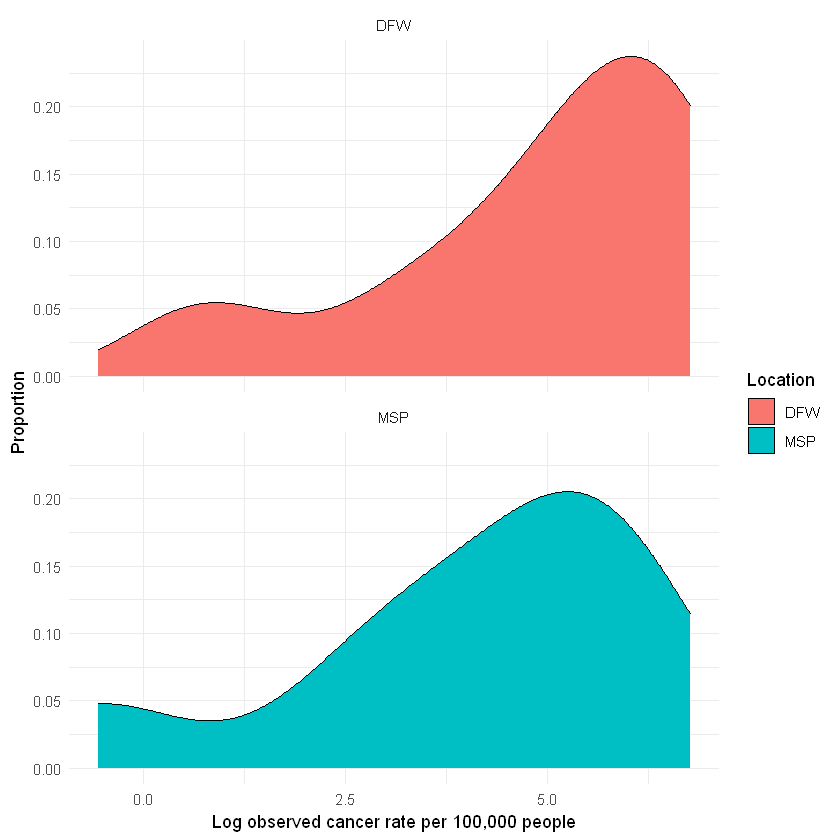

In [67]:
# plot of log observed rates
SkinCancer %>%
    ggplot()+
    geom_density(aes(logRate, fill=Location)) +
    facet_wrap(~Location,nrow=2) +
    theme_minimal() +
    labs(x="Log observed cancer rate per 100,000 people",
        y="Proportion")

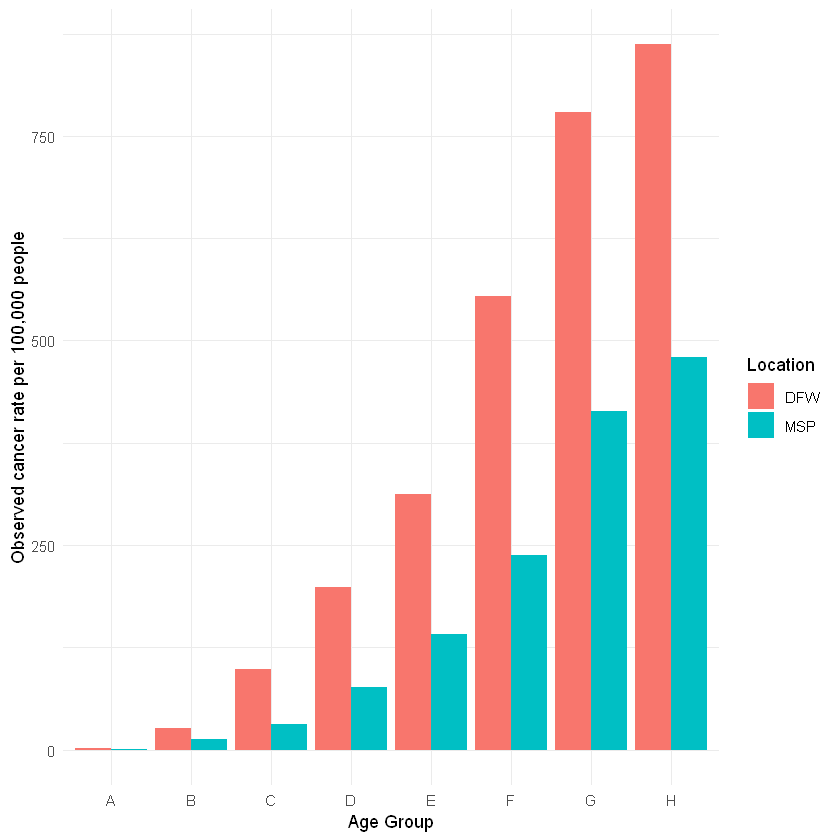

In [68]:
# explore modifying effect of age group
# plot age group for location side by side
SkinCancer %>%
    ggplot(aes(AgeGroup, RatePer100k, fill=Location)) +
    geom_bar(stat="identity", position="dodge") +
    theme_minimal()+
    labs(x="Age Group",
        y="Observed cancer rate per 100,000 people")

#### (c)  Unadjusted RR: 

Fit a Poisson regression model that uses only Location as a predictor, and report and interpret an unadjusted RR, along with a 95% confidence interval. 

In [72]:
mod1 <- glm(CancerCases~Location+offset(log(PopSize)), data=SkinCancer, family = "poisson")
summary(mod1)


Call:
glm(formula = CancerCases ~ Location + offset(log(PopSize)), 
    family = "poisson", data = SkinCancer)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-23.865   -7.477    3.782   10.396   18.364  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.38418    0.02838 -224.99   <2e-16 ***
LocationMSP -0.74312    0.05213  -14.26   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2790.3  on 15  degrees of freedom
Residual deviance: 2569.8  on 14  degrees of freedom
AIC: 2668

Number of Fisher Scoring iterations: 6


In [76]:
# Unadjusted RR
coef(mod1) #log of unadjusted RR
exp(coef(mod1)) #unadjusted RR is coefficient of Location

(Intercept) LocationMSP 
  -6.384178   -0.743121

(Intercept) LocationMSP 
0.001688055 0.475627180

In [78]:
confint(mod1)
exp(confint(mod1)) #95% CI of Location

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-6.4403138,-6.3290755
LocationMSP,-0.8460211,-0.6416409


Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),0.001595906,0.001783682
LocationMSP,0.429118979,0.526427917


#### (d)  Include AgeGroup?:  
Fit a model that includes Location while adjusting for AgeGroup. Do you think AgeGroup be included in the model?  Make sure to justify your answer, both conceptually, and numerically. 

In [80]:
mod2 <- update(mod1, .~.+AgeGroup)
summary(mod2)


Call:
glm(formula = CancerCases ~ Location + AgeGroup + offset(log(PopSize)), 
    family = "poisson", data = SkinCancer)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5043  -0.4816   0.0169   0.3697   1.2504  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.85360    0.44749 -24.255  < 2e-16 ***
LocationMSP  -0.80428    0.05221 -15.406  < 2e-16 ***
AgeGroupB     2.63019    0.46746   5.627 1.84e-08 ***
AgeGroupC     3.84735    0.45466   8.462  < 2e-16 ***
AgeGroupD     4.59519    0.45103  10.188  < 2e-16 ***
AgeGroupE     5.08728    0.45030  11.298  < 2e-16 ***
AgeGroupF     5.64541    0.44975  12.552  < 2e-16 ***
AgeGroupG     6.05855    0.45032  13.454  < 2e-16 ***
AgeGroupH     6.17819    0.45774  13.497  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2790.340  on 15  degrees of freedom
Residual deviance:    8.195 

In [86]:
# Likelihood ratio test comparing two models
anova(mod1, mod2)

Resid. Df,Resid. Dev,Df,Deviance
7,8.19505,NA,NA
14,2569.77001,-7,-2561.575


In [87]:
# comparing AIC
AIC(mod2); AIC(mod1)

[1] 120.4402

[1] 2668.015

#### (e)  Include PropWomen?: 

Now, fit a model that includes Location, AgeGroup, and PropWomen.  Compare this model to the model fit in part (d).  Do you think we should also include PropWomen in the model?  Why of why not? Make sure to justify your answer, both conceptually, and numerically. 

In [88]:
mod3 <- update(mod2, .~.+PropWomen)
summary(mod3)


Call:
glm(formula = CancerCases ~ Location + AgeGroup + PropWomen + 
    offset(log(PopSize)), family = "poisson", data = SkinCancer)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.63465  -0.34481  -0.01724   0.19971   1.03175  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.87136    1.05458  -9.360  < 2e-16 ***
LocationMSP -0.79443    0.05299 -14.992  < 2e-16 ***
AgeGroupB    2.68548    0.47035   5.710 1.13e-08 ***
AgeGroupC    3.87843    0.45568   8.511  < 2e-16 ***
AgeGroupD    4.57861    0.45133  10.145  < 2e-16 ***
AgeGroupE    5.01397    0.45587  10.999  < 2e-16 ***
AgeGroupF    5.51643    0.46681  11.817  < 2e-16 ***
AgeGroupG    5.96972    0.45846  13.021  < 2e-16 ***
AgeGroupH    6.01070    0.48572  12.375  < 2e-16 ***
PropWomen   -1.96369    1.90971  -1.028    0.304    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance:

In [90]:
anova(mod3, mod2)

Resid. Df,Resid. Dev,Df,Deviance
6,7.137383,NA,NA
7,8.195050,-1,-1.057667


#### (f) Adjusted RRs:

Using the model fit in part (e), report and interpret RR(s) relevant to Location.

In [93]:
exp(coef(mod3))

(Intercept)  LocationMSP    AgeGroupB    AgeGroupC    AgeGroupD    AgeGroupE 
5.163265e-05 4.518376e-01 1.466520e+01 4.834802e+01 9.737862e+01 1.505015e+02 
   AgeGroupF    AgeGroupG    AgeGroupH    PropWomen 
2.487446e+02 3.913976e+02 4.077677e+02 1.403399e-01